# Taxi Fare prediction using Machine Learning models

## 1) Synopsis :

The Problem Statement for this project is to predict the fare amount ( inclusive of tolls) for a taxi ride in New York City

The dataset is taken from Kaggle website.

In this notebook, we will try to predict the taxi fare amount(**fare_amount**) based on the following features :

- **pickup_datetime** - timestamp value indicating when the taxi ride started.
- **pickup_longitude** - float for longitude coordinate of where the taxi ride started.
- **pickup_latitude** - float for latitude coordinate of where the taxi ride started.
- **dropoff_longitude** - float for longitude coordinate of where the taxi ride ended.
- **dropoff_latitude** - float for latitude coordinate of where the taxi ride ended.
- **passenger_count** - integer indicating the number of passengers in the taxi ride.

#### Since the goal here is Fare amount prediction, which is a numerical variable, based on pickup and dropoff locations, each being numeric as well, the analytical approach used for the problem statement will be Regression Analysis.

## 2) Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

## 3) Loading the Dataset

In [2]:
#Loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

## 4) Data Understanding and Cleaning

In [3]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
34949,44:00.0,5.3,2009-10-15 16:44:00 UTC,-73.844407,40.720572,-73.845362,40.730337,4
9852,08:39.0,7.7,2010-12-11 22:08:39 UTC,-73.964740,40.756363,-73.982636,40.735632,1
13033,34:00.0,7.3,2012-03-11 17:34:00 UTC,-73.957482,40.776865,-73.976138,40.751340,1
34746,47:44.0,7.7,2011-04-12 18:47:44 UTC,-73.961958,40.810608,-73.973002,40.786860,1
22052,40:35.0,8.5,2011-04-26 07:40:35 UTC,-73.997490,40.736457,-73.973876,40.762910,1
16370,02:09.0,14.5,2012-03-17 00:02:09 UTC,-73.990558,40.728825,-73.970705,40.785624,1
5481,12:00.0,6.9,2012-01-26 13:12:00 UTC,-73.992620,40.748012,-73.989572,40.767770,1
43804,00:00.0,6.5,2013-01-14 20:00:00 UTC,-73.972305,40.763947,-73.982100,40.757092,1
16535,32:41.0,4.5,2010-11-09 23:32:41 UTC,-73.941567,40.791727,-73.951998,40.780563,1
76,26:13.0,7.7,2010-12-04 14:26:13 UTC,-73.996601,40.736569,-73.982152,40.744322,1


In [4]:
#Checking number of entries in the dataset
df.shape

(50000, 8)

In [5]:
#checking datatypes of different entries in the dataset
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
#checking for missing values
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [7]:
#checking min, max, mean etc of the different columns of the dataframe
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


#### Here we see that in "amount" and "no_of_passenger" columns there are values that do not make sense

- As taxi fare cannot be negative or zero in case of a genuine taxi ride
- Number of passengers must be atleast 1

Hence Checking for the above two inconsistencies

In [8]:
df_sample=df[df["no_of_passenger"]==0]

In [9]:
df_sample

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
314,16:15.0,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0
566,33:18.0,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0
678,24:20.0,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0
1160,58:48.0,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0
1935,09:28.0,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0
...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,2012-04-03 22:57:10 UTC,-73.988813,40.731228,-73.954773,40.733567,0
47401,41:22.0,9.7,2012-03-08 12:41:22 UTC,-73.991375,40.732217,-73.976507,40.758900,0
47920,45:00.0,5.3,2012-03-11 18:45:00 UTC,-73.966112,40.794478,-73.953933,40.787287,0
48118,56:28.0,8.1,2011-03-25 19:56:28 UTC,-73.973382,40.743915,-73.948883,40.777647,0


In [10]:
df_sample2=df[df["amount"]<=0]

In [11]:
df_sample2

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,37:10.0,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
10002,26:01.0,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.713960,1
13032,57:10.0,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
27891,40:28.0,0.0,2015-05-15 21:40:28 UTC,-74.077927,40.805714,-74.077919,40.805721,1
28839,39:10.0,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,19:45.0,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,29:46.0,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
47302,13:39.0,0.0,2010-03-18 19:13:39 UTC,-73.942346,40.806269,-73.942463,40.806129,1


In [12]:
df=df[(df["amount"]>0) & (df["no_of_passenger"]>0)]

In [13]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


#### Checking the dataframe with describe() once again

In [14]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000
75%,12.500000,-73.967145,40.767364,-73.963619,40.768163,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


#### Checking for similar inconsistencies in The latitudes and longitudes

Having values of either Latitude or Longitude or both as 0 at New York or nearby cities is not possible
hence, checking for such entries

In [15]:
df_sample3=df[(df['longitude_of_pickup']==0) | (df['latitude_of_pickup']==0)|
               (df['longitude_of_dropoff']==0)| (df['latitude_of_dropoff']==0)
              |(df['date_time_of_pickup']==0)]
        

In [16]:
df_sample3

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
11,24:00.0,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3
15,57:00.0,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1
26,01:00.0,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1
124,22:00.0,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2
192,08:00.0,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...
49625,50:27.0,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1
49816,54:00.0,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1
49845,57:15.0,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3
49856,25:00.0,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5


##### So there are 993 rows with values of Latitude and/or Longitude 0

In [17]:
#### removing the above entries from the dataframe
'''condition=(df['longitude_of_pickup']==0) | (df['latitude_of_pickup']==0)|
               (df['longitude_of_dropoff']==0)| (df['latitude_of_dropoff']==0)'''
df=df[~((df['longitude_of_pickup']==0) | (df['latitude_of_pickup']==0)|
               (df['longitude_of_dropoff']==0)| (df['latitude_of_dropoff']==0))]

In [18]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [19]:
#### Checking for duplicate values
duplicate=df.duplicated()
print(duplicate.sum())

0


In [20]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [21]:
#### Converting the format of timestamp in the dataframe 
df['pickup_datetime'] = pd.to_datetime(df['date_time_of_pickup'])


In [22]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup                  object
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
pickup_datetime         datetime64[ns, UTC]
dtype: object

## 5) Data Visualization

In [23]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'pickup_datetime'],
      dtype='object')

In [24]:
cols=['amount', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger']

amount


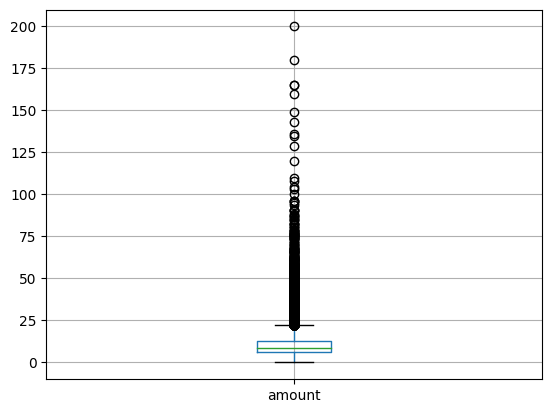

After removing outliers



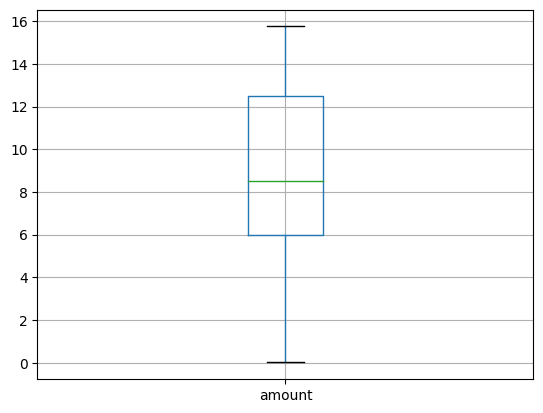

longitude_of_pickup


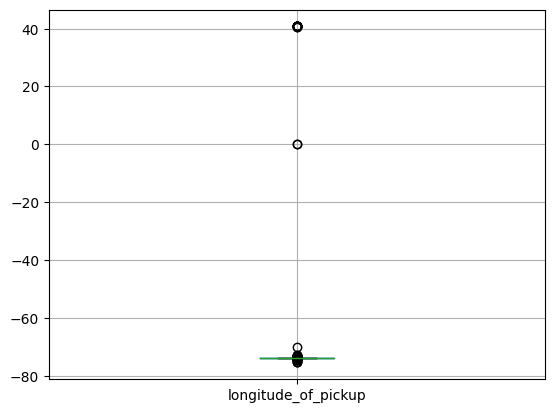

After removing outliers



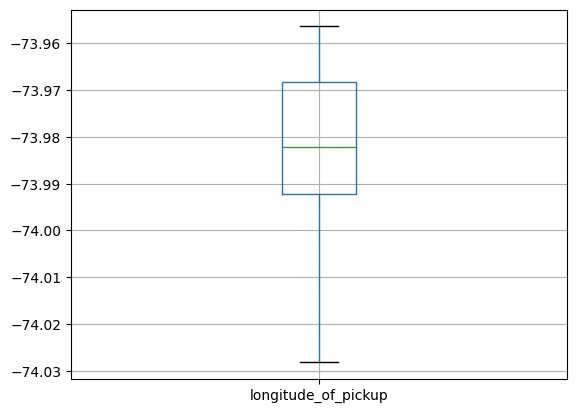

latitude_of_pickup


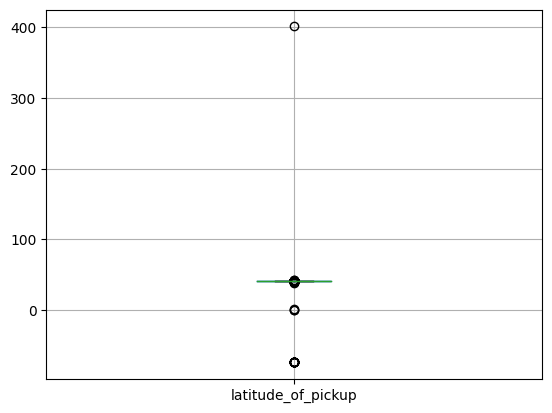

After removing outliers



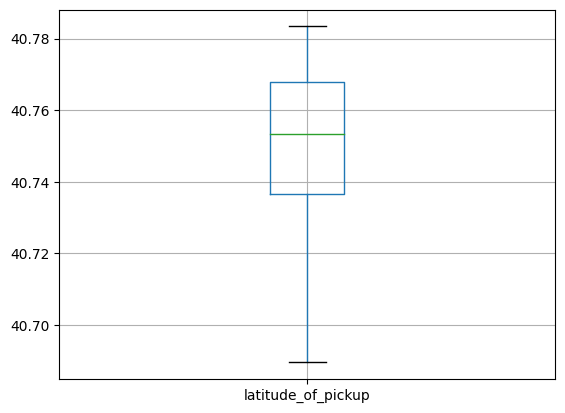

longitude_of_dropoff


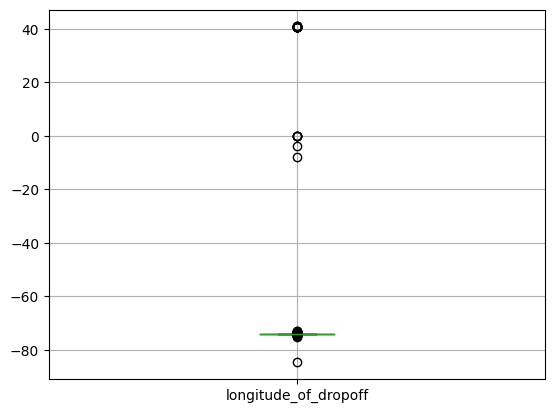

After removing outliers



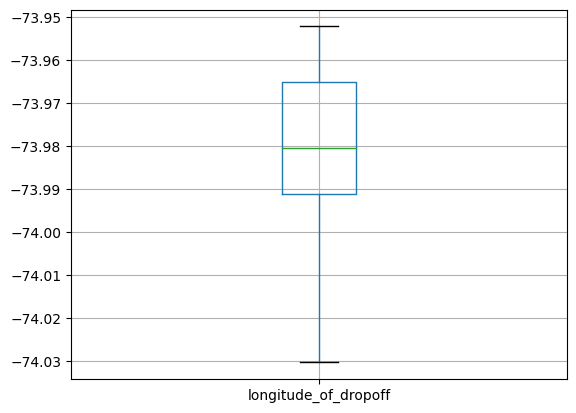

latitude_of_dropoff


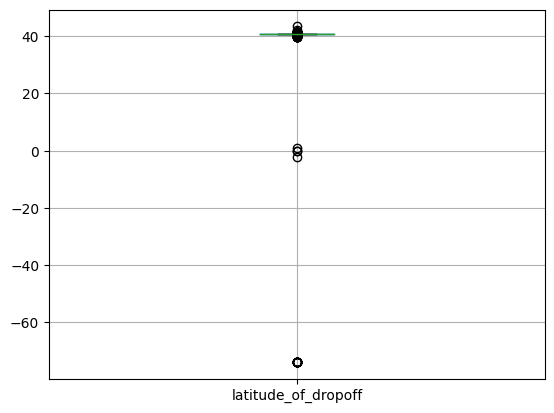

After removing outliers



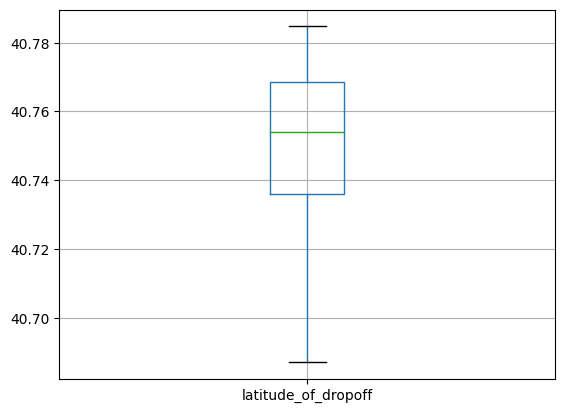

no_of_passenger


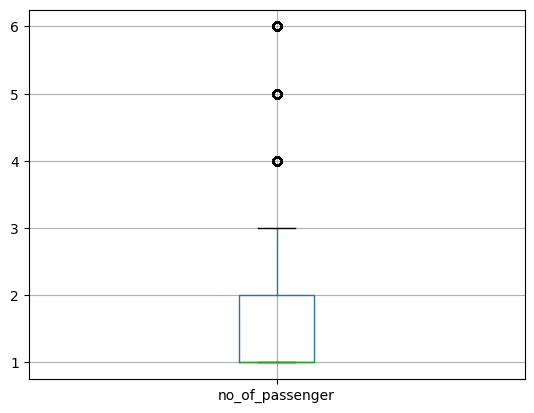

After removing outliers



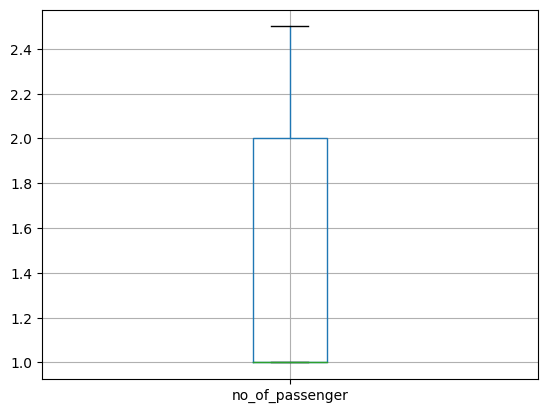

In [25]:
def rem_out(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    l_range=q1-1.5*iqr
    u_range=q1+1.5*iqr
    return l_range,u_range
for col in cols :
    print(col)
    df.boxplot(column=col)
    plt.show()
    u_lt,h_lt=rem_out(df[col])
    df[col]=np.where(df[col]>h_lt,h_lt,df[col])
    df[col]=np.where(df[col]<u_lt,u_lt,df[col])
    print("After removing outliers\n")
    df.boxplot(column=col)
    plt.show()

#### The outliers have been succesfully handled

#### Adding a column for distance travelled , utilsing **Haversine formula** to calculate the distance

In [26]:
def distance(lat1, lon1, lat2, lon2):
    
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...
df['distance'] = distance(df.latitude_of_pickup, df.longitude_of_pickup, 
                                    df.latitude_of_dropoff, df.longitude_of_dropoff)

In [27]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_datetime,distance
0,26:21.0,4.50,2009-06-15 17:26:21 UTC,-73.956374,40.721319,-73.952267,40.712278,1.0,2009-06-15 17:26:21+00:00,0.660663
1,52:16.0,15.75,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16+00:00,5.250670
2,35:00.0,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00+00:00,0.863411
3,30:42.0,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21 04:30:42+00:00,1.739386
4,51:00.0,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00+00:00,1.242218
...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.00,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1.0,2013-06-12 23:25:15+00:00,3.069806
49996,19:18.0,7.50,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1.0,2015-06-22 17:19:18+00:00,0.543517
49997,53:00.0,6.90,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1.0,2011-01-30 04:53:00+00:00,1.406341
49998,09:00.0,4.50,2012-11-06 07:09:00 UTC,-73.956374,40.777567,-73.953450,40.779687,2.0,2012-11-06 07:09:00+00:00,0.211803


#### histogram for fare amount

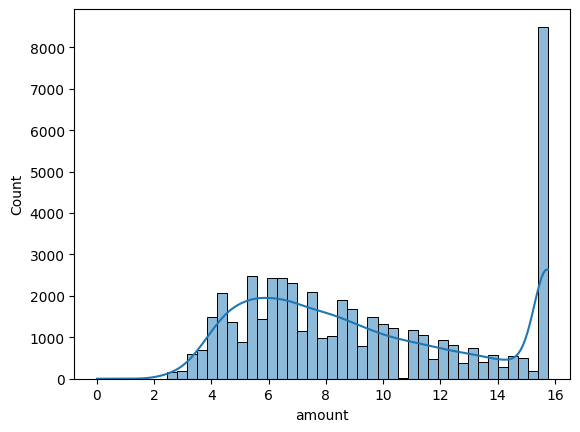

In [28]:

sns.histplot(x='amount', data=df, kde=True)
plt.show()

#### Heatmap for the data

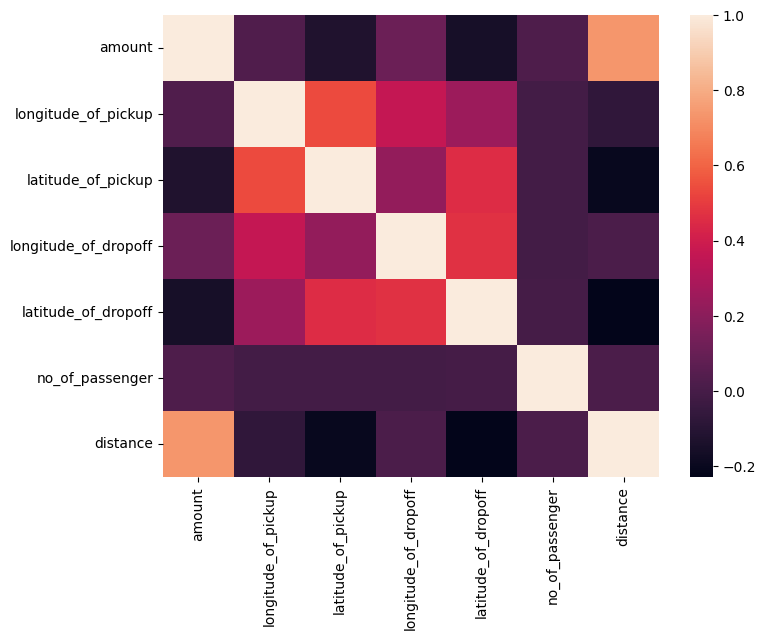

In [29]:
plt.figure(figsize=(8,6));
sns.heatmap(df.corr());# Rotate x-labels with the help of matplotlib


#### Countplot for Number of Passengers

<AxesSubplot: xlabel='no_of_passenger', ylabel='count'>

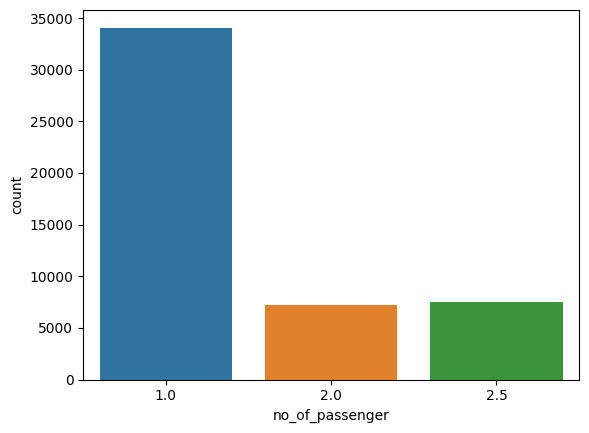

In [30]:
sns.countplot(x="no_of_passenger",data=df)

#### Scatterplot for the dataset

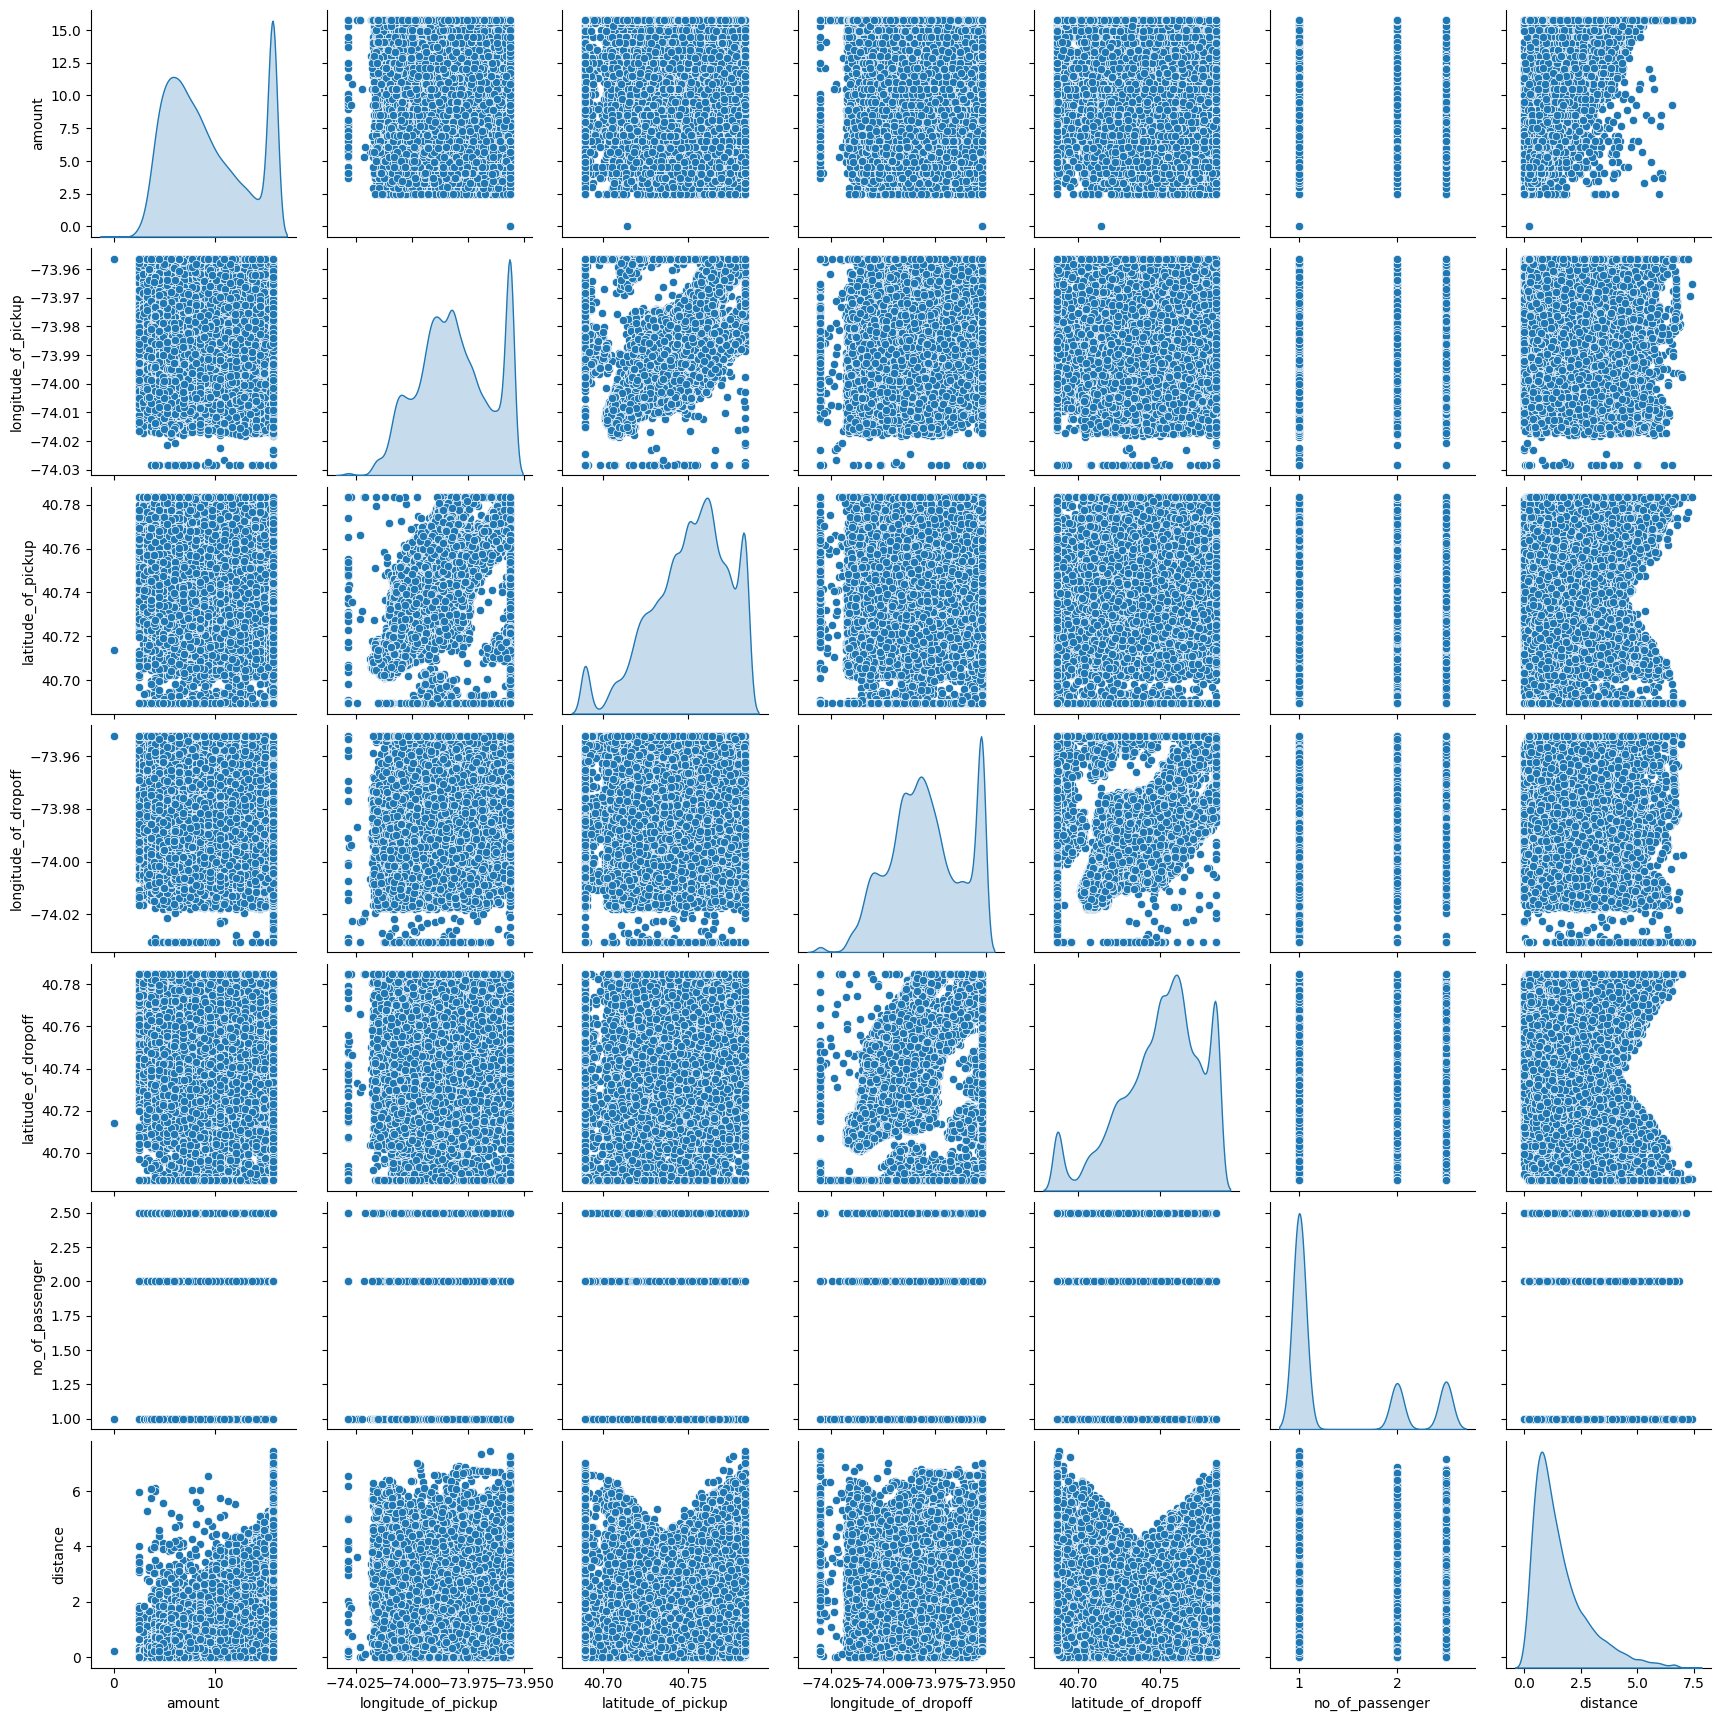

In [31]:

sns.pairplot(df,diag_kind="kde")
plt.show()

In [32]:
#### Histogram for distance travelled

<AxesSubplot: xlabel='distance', ylabel='Count'>

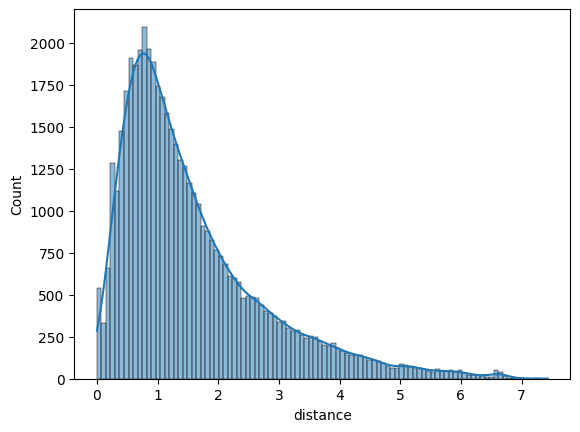

In [33]:
sns.histplot(x='distance',data=df,kde=True)

In [34]:
### Histogram plots for all attributes

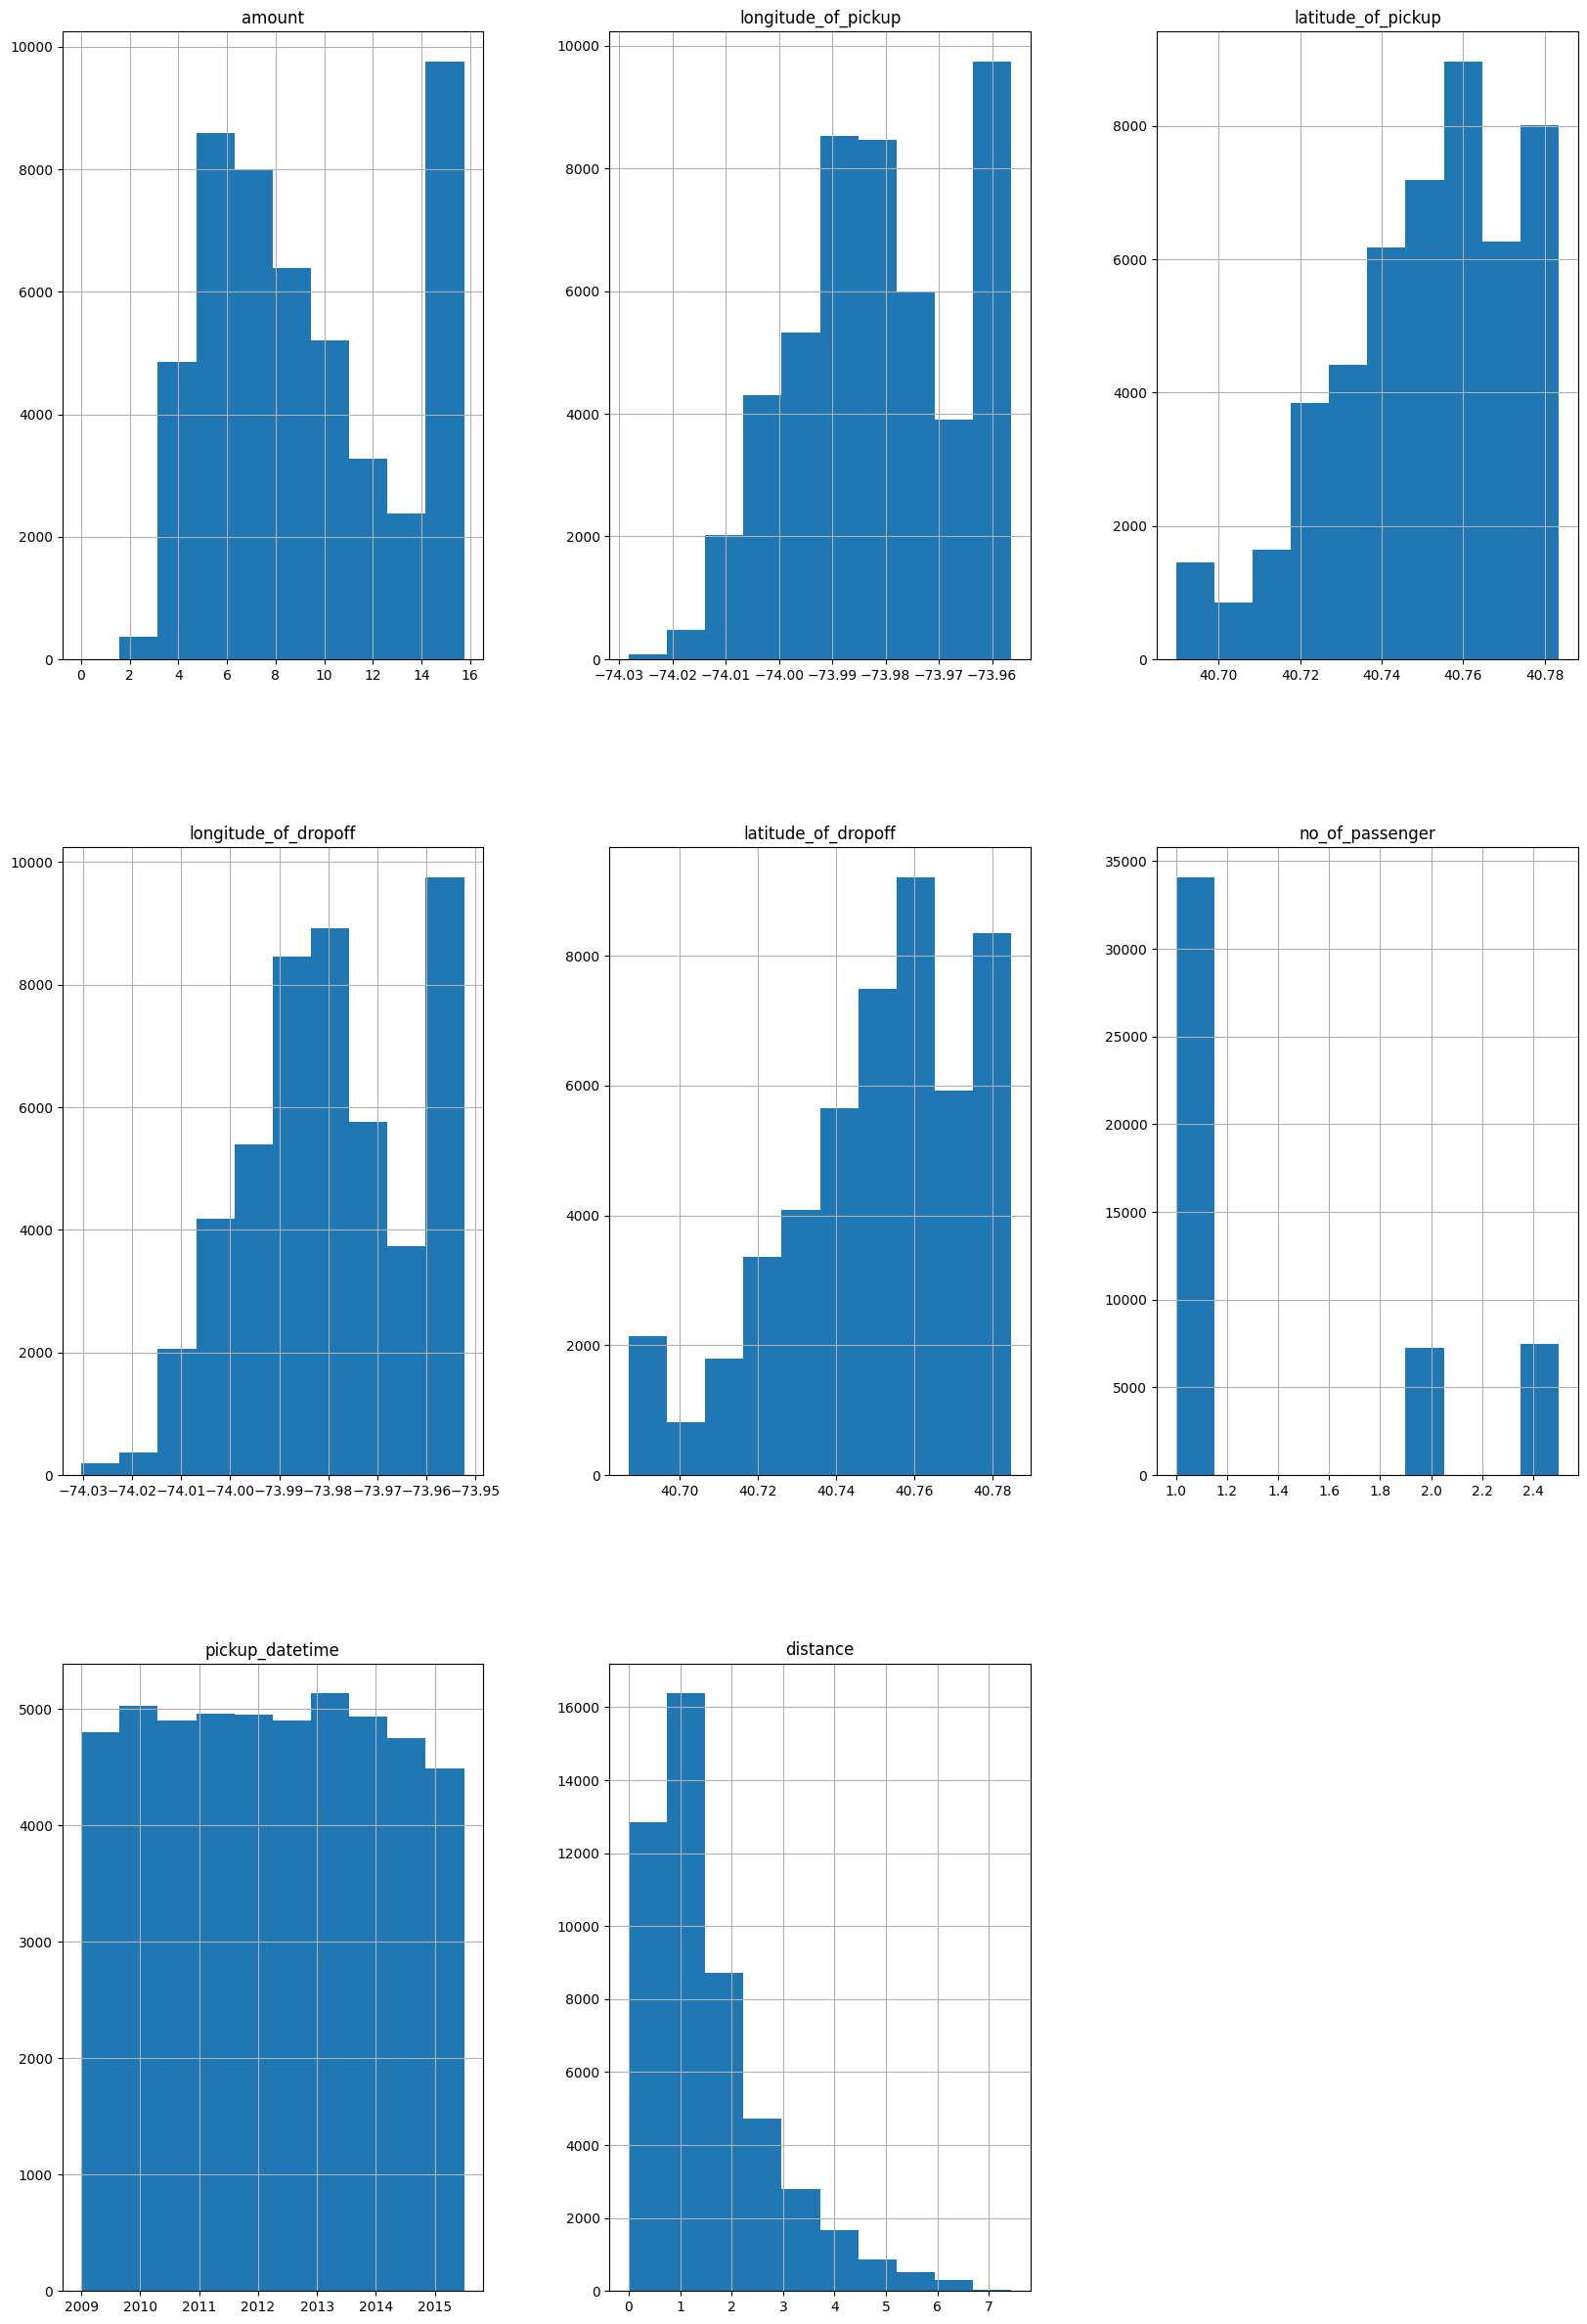

In [35]:
df.hist(figsize=(20,30))
plt.show()

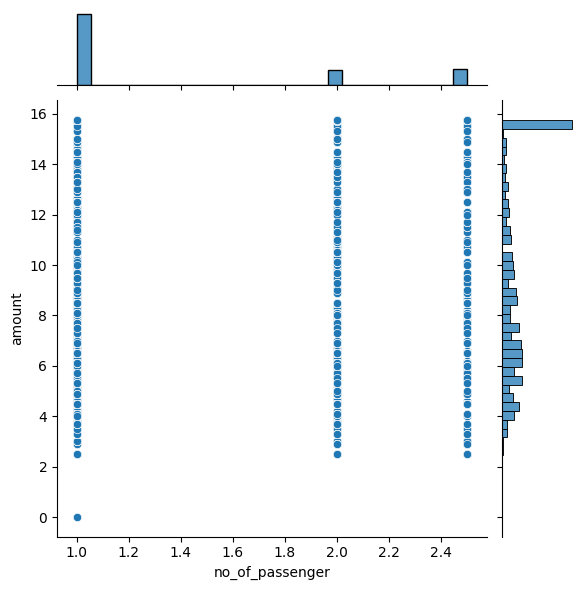

In [36]:
sns.jointplot(x=df['no_of_passenger'],y=df['amount'],data=df)

## Inferences from the above plots :
- Majority of the taxi rides were having a single passenger
- The taxis travelled upto 2 km most of the times, above 6 km being extremely rare
- Majority of the fares were above \\$ 14 , a considerable amount being in range \\$ 5 to $9.
- single person rides were comparatively more expensive

In [37]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup                  object
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                     float64
pickup_datetime         datetime64[ns, UTC]
distance                            float64
dtype: object

#### Seperating Hour, Date and Time from pickup_datetime

In [38]:
df['year'] = df.pickup_datetime.apply(lambda t: t.year)
df['weekday'] = df.pickup_datetime.apply(lambda t: t.weekday())
df['hour'] = df.pickup_datetime.apply(lambda t: t.hour)

#### Removing unique_id, date_time_of_pickup, pickup_datetime from the Dataframe

In [39]:
df=df.drop(['unique_id','date_time_of_pickup','pickup_datetime' ], axis=1)

In [40]:
df.dtypes

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger         float64
distance                float64
year                      int64
weekday                   int64
hour                      int64
dtype: object

## 6) Model Building

### Linear regression

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
x=df.drop("amount",axis=1)
y=df['amount']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=25)

In [44]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [45]:
model1.score(x_train,y_train)

0.5714858152484776

In [46]:
model1.score(x_test,y_test)

0.5745924114298986

### Standardization with Linear Regression

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler=StandardScaler()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=25)

In [50]:
x_scaled=scaler.fit_transform(x_train)

In [51]:
x=df.drop("amount",axis=1)
y=df['amount']

In [52]:
model2=LinearRegression()
model2.fit(x_scaled,y_train)

LinearRegression()

In [53]:
x_testsc=scaler.fit_transform(x_test)

In [54]:
model2.score(x_scaled,y_train)

0.5714858152484781

In [55]:
model2.score(x_testsc,y_test)

0.5745799175912121

### KNN 

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [57]:
xscaled=x.apply(zscore) ###convert all attributes to zscale

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [59]:
model3=KNeighborsRegressor(n_neighbors=40, weights='uniform')

In [60]:
### Calling Nearest Neighbour algorithm
model3.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=40)

In [61]:
model3.score(x_train,y_train)

0.6192415986497337

In [62]:
model3.score(x_test,y_test)

0.6005780874738234

### Standardization with KNN

In [63]:
scaler=StandardScaler()

In [67]:
x_scaled=scaler.fit_transform(x_train)

In [68]:
model4=KNeighborsRegressor(n_neighbors=40, weights='uniform')

In [69]:
model4.fit(x_scaled,y_train)

KNeighborsRegressor(n_neighbors=40)

In [70]:
model4.score(x_scaled,y_train)

0.6700896205301958

In [71]:
x_testsc=scaler.fit_transform(x_test)

In [72]:
model4.score(x_testsc,y_test)

0.6550107575749982

### SVR model

In [79]:
from sklearn.svm import SVR

In [344]:
model5=SVR(kernel='linear',degree=5,coef0=-1,C=0.001)

In [345]:
x=df.drop("amount",axis=1)
y=df['amount']

In [346]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [347]:
model5.fit(x_train,y_train)

SVR(C=0.001, coef0=-1, degree=5, kernel='linear')

In [348]:
model5.score(x_train,y_train)

0.529871148484258

In [349]:
model5.score(x_test,y_test)

0.5338666186761507

### Standardization with SVR

In [86]:
scaler=StandardScaler()

In [87]:
x_scaled=scaler.fit_transform(x_train)

In [88]:
x_testsc=scaler.fit_transform(x_test)

In [90]:
model6=SVR()

In [91]:
model6.fit(x_scaled,y_train)

SVR()

In [92]:
model6.score(x_scaled,y_train)

0.6853550006057236

In [93]:
model6.score(x_testsc,y_test)

0.6806318605981877

### Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
x=df.drop("amount",axis=1)
y=df['amount']

In [109]:
model7=DecisionTreeRegressor(max_depth=5)

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=40)

In [111]:
model7.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [112]:
model7.score(x_train,y_train)

0.668527367124631

In [113]:
model7.score(x_test,y_test)

0.6659871551196566

### Bagging Regressor model

In [192]:
from sklearn.ensemble import BaggingRegressor

In [291]:
model8=BaggingRegressor(n_estimators=20,random_state=30,warm_start=True,max_samples=0.047877)

In [292]:
model8.fit(x_train,y_train)

BaggingRegressor(max_samples=0.047877, n_estimators=20, random_state=30,
                 warm_start=True)

In [293]:
model8.score(x_train,y_train)

0.7197494355102727

In [294]:
model8.score(x_test,y_test)

0.7005925759987339

### AdaBoost Regression

In [286]:
from sklearn.ensemble import AdaBoostRegressor

In [295]:
model9=AdaBoostRegressor()

In [296]:
model9.fit(x_train,y_train)

AdaBoostRegressor()

In [297]:
model9.score(x_train,y_train)

0.5323354246880294

In [298]:
model9.score(x_test,y_test)

0.5321403842707011

### Gradient Boost Regression

In [299]:
from sklearn.ensemble import GradientBoostingRegressor

In [301]:
model10=GradientBoostingRegressor()

In [302]:
model10.fit(x_train,y_train)

GradientBoostingRegressor()

In [303]:
model10.score(x_train,y_train)

0.7203682793238598

In [304]:
model10.score(x_test,y_test)

0.7178474692640742

### Random Forest Classifier model

In [309]:
from sklearn.ensemble import RandomForestRegressor

In [314]:
model11=RandomForestRegressor(max_depth=5)

In [315]:
model11.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [316]:
model11.score(x_train,y_train)

0.6824109084166734

In [317]:
model11.score(x_test,y_test)

0.680326004491265